<h1><center><b>Linear Regression Assigment</b></center></h1>


#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
### Import initial libraries
import pandas as pd
import numpy as np

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1 - Reading Data and Understanding it

In [2]:
# import dataset

bikes_df = pd.read_csv('day.csv')

In [3]:
# Quick look at data
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the rows and col count
bikes_df.shape

(730, 16)

In [5]:
#check for null values and field types
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#describe the data
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


***
#### Conclusion from understanding data set
* There are no null values hence dont need to action with null values
* There are 4 variables that while are integer but are categorical:
<b>season, mnth, weekday,weathersit</b>
* There are 3 binary variables:
<b>yr, holiday, workingday</b>
* Others are numerical variables except one date variable

##### Dropping not-needed features
* Instance variable is unique id column and has no relation in prediction sales, 
* Dteday is the date/day column but there are other fields like weekday, month, season etc that are available as predictors
* In assignment we are asked to predict demand of bikes hence I would keep just 'cnt' as target variable and drop casual and registered variable
***

In [7]:
# dropping instant, dteday, casual and registered variables

bikes_df.drop(['instant', 'dteday','casual','registered'], axis=1,inplace=True)

In [8]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Convert 'season' to categorical variable
bikes_df['season'] = bikes_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikes_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
# convert 'mnth' to categorical variable
bikes_df['mnth'] = bikes_df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes_df['mnth'].value_counts()

Dec    62
Aug    62
Mar    62
Jan    62
May    62
Oct    62
Jul    62
Jun    60
Nov    60
Sep    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [11]:
# convert 'mnth' to categorical variable
bikes_df['weekday'] = bikes_df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bikes_df['weekday'].value_counts()

Monday       105
Tuesday      105
Friday       104
Sunday       104
Wednesday    104
Saturday     104
Thursday     104
Name: weekday, dtype: int64

In [12]:
# convert 'weathersit' to categorical variable
bikes_df['weathersit'] = bikes_df['weathersit'].map({1:'Clear',2:'Misty',3:'Light Snow'})
bikes_df['weathersit'].value_counts()

Clear         463
Misty         246
Light Snow     21
Name: weathersit, dtype: int64

### Step 2 - Visualizing Data 

***
Visualize the data to understand following factors:
1) Determine relationship between target and predictor variables<br>
2) Understand multicollinearity between predictor variable
***

In [13]:
## import libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns

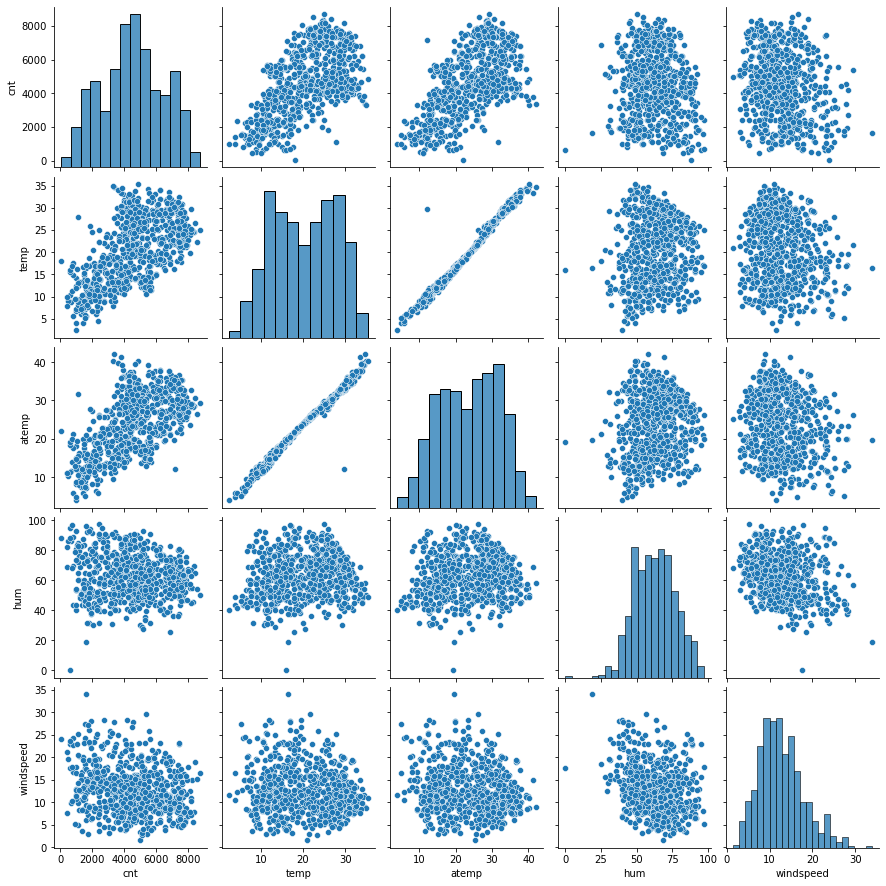

In [14]:
#visualize 6 predictor variables with cnt target 
sns.pairplot(bikes_df[['cnt','temp','atemp','hum','windspeed']])
plt.show()

#### Observations from visualizing numerical variable
***
* We see that temp, atemp, hum, windspeed do show linear relationship with target<br>
* temp and atemp clearly show multicollinearity
***

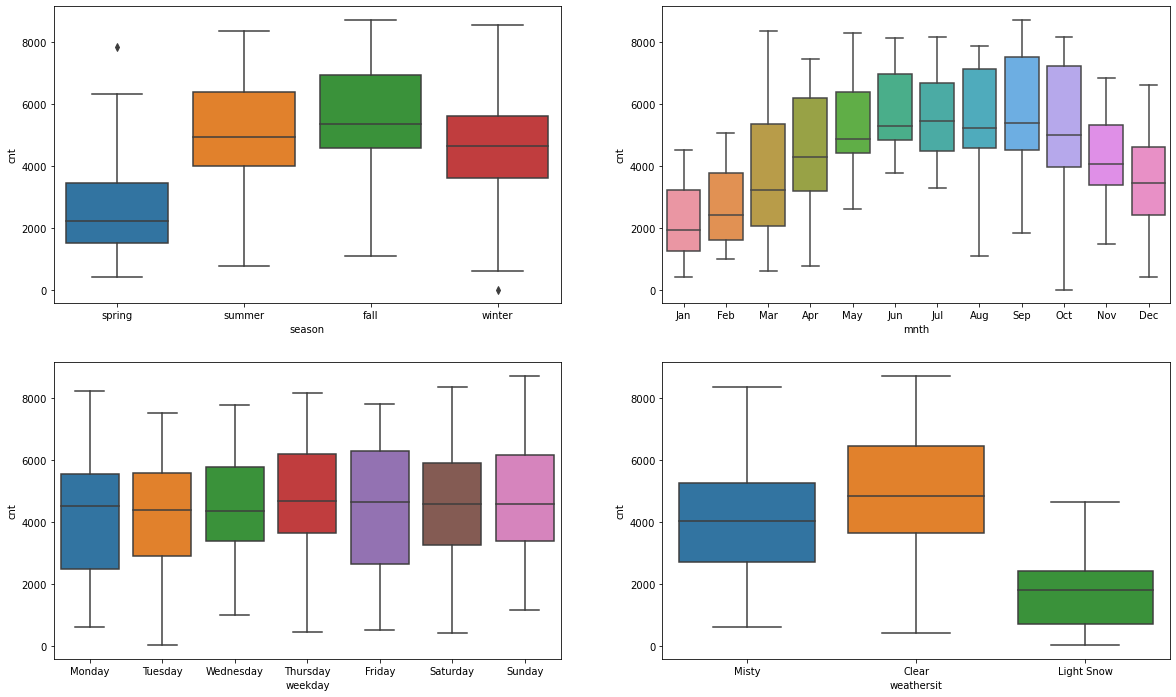

In [15]:
#visualize categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_df)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_df)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_df)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_df)

plt.show()

#### Observeration from categorical variables
***
* Interstingly Spring has least demand where as fall has highest with median matching demand in summer
* We observe that range of demaind is highest on Friday and Mondays
* Interstingly median of bike demand is same on all weekdays
* Expectedly the least demand of bikes is in Light Snow weather and highest on clear days
***

<function matplotlib.pyplot.show(close=None, block=None)>

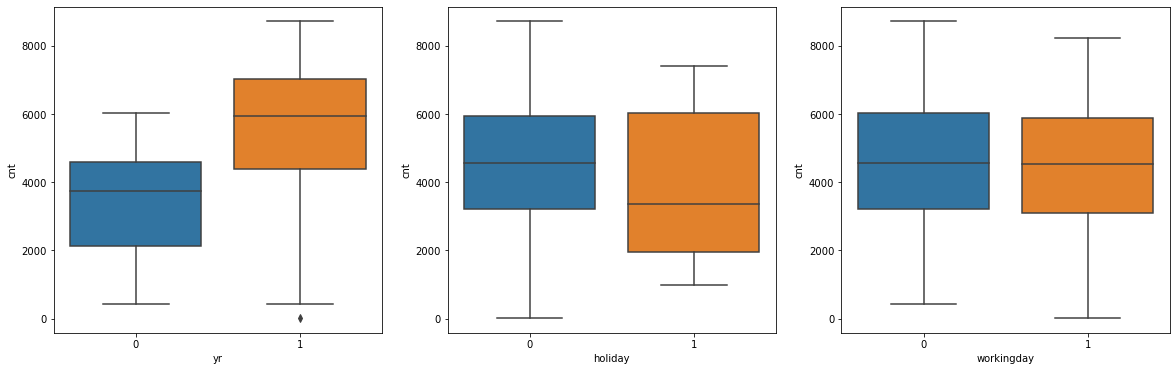

In [16]:
#visualize binary 'yr','holiday','workingday'
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_df)
plt.subplot(1,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_df)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_df)
plt.show

#### Observeration from binary variables
***
- The demand of bikes was clearly higher in 2019
- Interestingly demands of bike on working day was same during both the years
***

### Step 3 - Data Preparation

##### Dummy Variables
We are aware that we have 4 categorical variables, to convert them into integers, we will create dummy variables 

In [17]:
#dummy variable creation for 'season'

seasons = pd.get_dummies(bikes_df['season'], drop_first = True)
bikes_df= pd.concat([bikes_df, seasons], axis = 1)

In [18]:
bikes_df.drop(['season'], axis = 1, inplace = True)

In [19]:
bikes_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [20]:
#dummy variable creation for 'mnth'
month = pd.get_dummies(bikes_df['mnth'], drop_first = True)
bikes_df= pd.concat([bikes_df, month], axis = 1)

In [21]:
bikes_df.drop(['mnth'], axis = 1, inplace = True)

In [22]:
bikes_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [23]:
#dummy variable creation for 'weekday'
weekdays = pd.get_dummies(bikes_df['weekday'], drop_first = True)
bikes_df= pd.concat([bikes_df, weekdays], axis = 1)

In [24]:
bikes_df.drop(['weekday'], axis = 1, inplace = True)

In [25]:
bikes_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,Misty,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#dummy variable creation for 'weathersit'
weather = pd.get_dummies(bikes_df['weathersit'], drop_first = True)
bikes_df= pd.concat([bikes_df, weather], axis = 1)

In [27]:
bikes_df.drop(['weathersit'], axis = 1, inplace = True)

In [28]:
bikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


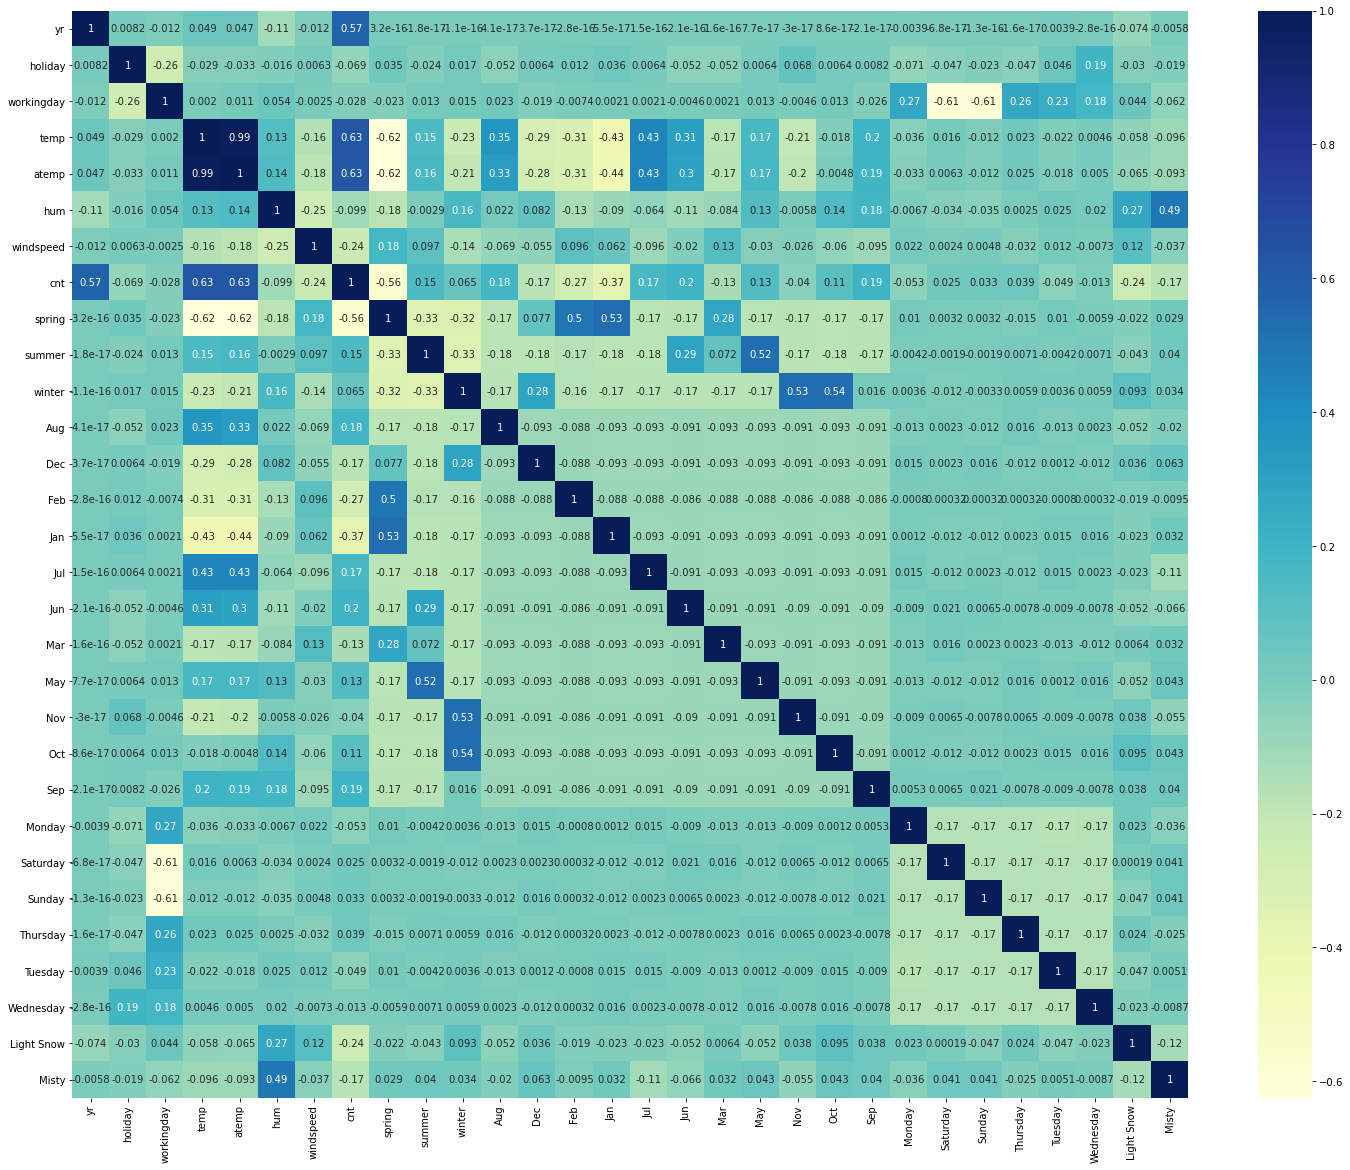

In [29]:
# Now lets check correlation heatmap to understand correlation with target variable
plt.figure(figsize=(25, 20))
sns.heatmap(bikes_df.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [30]:
# Above shows that tempand atemp are extremely mutlicollinear
bikes_df.drop(['atemp'], axis=1,inplace=True)

#### Observation from corrleation heatmap
***
Following variables are highly correlated with target 'cnt' variable:
- Temp
- Year
- Summer
- July/Aug/Sep

***

### Step 4: Splitting the Data into Training and Testing Set

In [31]:
#import necessary library

from sklearn.model_selection import train_test_split

In [32]:
# Split dataset in train and test dataset
np.random.seed(0)
bikedf_train, bikedf_test = train_test_split(bikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 5: Perform scaling

In [33]:
# perform minmaxscaling hence importing that library
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
# Using fit_transform to fit and transform training data
numericvars = ['cnt','temp','hum','windspeed']
bikedf_train[numericvars] = scaler.fit_transform(bikedf_train[numericvars])

In [36]:
bikedf_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
bikedf_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 6:  Dividing into X and Y sets for the model building

In [38]:
y_train = bikedf_train.pop('cnt')
X_train = bikedf_train

## Data Modelling

### Step 7: Creation of model using RFE

Will use RFE (Recursive Feature Elimination) to find out top 15 dependent features 

In [39]:
# Importing RFE and LinearRegression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
# List out top 15 features along with their ranking and 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Misty', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow', 'Misty'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics


In [44]:
import statsmodels.api as sm  

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.34e-189
Time:                        20:18:43   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

### Checking VIF
We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

We could have:

High p-value and High VIF, definitely drop that variable<br>
High-low:<br>
High p, low VIF : remove these first and create new model<br>
Low p, high VIF: remove these after the ones above<br>
Low p-value and Low VIF, definitely keep them

In [49]:
# import module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Misty,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


In [52]:
# Among all the columns given 'Dec' column has highest P-Value and VIF is low 
# We will start with removing 'Dec' column
X_train_one = X_train_rfe.drop(['Dec'], axis=1)

In [53]:
# Let's start with creating new model after creating 'Dec' column

In [54]:
X_train_LM1 = sm.add_constant(X_train_one)
LM1 = sm.OLS(y_train,X_train_LM1).fit()
print(LM1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.25e-189
Time:                        20:18:43   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

In [55]:
X_train_LM1 = X_train_LM1 .drop(['const'], axis=1)

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_LM1.columns
vif['VIF'] = [variance_inflation_factor(X_train_LM1.values, i) for i in range(X_train_LM1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
13,Misty,2.29
0,yr,2.09
8,Jan,1.67
9,Jul,1.59


In [57]:
# Among all the columns given 'Nov' column has highest P-Value and VIF is low 
# We will start with removing 'Nov' column
X_train_two = X_train_one.drop(['Nov'], axis=1)

In [58]:
#Let's start creating new model after removing Nov colum
X_train_LM2 = sm.add_constant(X_train_two)
LM2 = sm.OLS(y_train,X_train_LM2).fit()
print(LM2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.45e-190
Time:                        20:18:43   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.0

In [59]:
X_train_LM2 = X_train_LM2 .drop(['const'], axis=1)

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_LM2.columns
vif['VIF'] = [variance_inflation_factor(X_train_LM2.values, i) for i in range(X_train_LM2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
12,Misty,2.28
0,yr,2.09
8,Jan,1.67
9,Jul,1.59


In [61]:
# Among all the columns given 'Jan' column has highest P-Value and VIF is low 
# We will start with removing 'Jan' column
X_train_three = X_train_two.drop(['Jan'], axis=1)

In [62]:
#Let's start creating new model after removing Jan column
X_train_LM3 = sm.add_constant(X_train_three)
LM3 = sm.OLS(y_train,X_train_LM3).fit()
print(LM3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.69e-190
Time:                        20:18:43   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

In [63]:
X_train_LM3 = X_train_LM3 .drop(['const'], axis=1)

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_LM3.columns
vif['VIF'] = [variance_inflation_factor(X_train_LM3.values, i) for i in range(X_train_LM3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,Misty,2.28
0,yr,2.08
8,Jul,1.58
9,Sep,1.38


In [65]:
# Among all the columns given 'hum' column has highest VIF, lets check after removing 'hum' column
X_train_four = X_train_three.drop(['hum'], axis=1)

In [66]:
#Let's start creating new model after removing Nov colum
X_train_LM4 = sm.add_constant(X_train_four)
LM4 = sm.OLS(y_train,X_train_LM4).fit()
print(LM4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.40e-187
Time:                        20:18:43   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [67]:
X_train_LM4 = X_train_LM4 .drop(['const'], axis=1)

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_LM4.columns
vif['VIF'] = [variance_inflation_factor(X_train_LM4.values, i) for i in range(X_train_LM4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,Jul,1.58
10,Misty,1.55
8,Sep,1.34
9,Light Snow,1.08


In [69]:
# Among all the columns given 'july' column has high P-Value and Low VIF, check with dropping it
X_train_five = X_train_four.drop(['summer'], axis=1)

In [70]:
#Let's start creating new model after removing Nov colum
X_train_LM5 = sm.add_constant(X_train_five)
LM5 = sm.OLS(y_train,X_train_LM5).fit()
print(LM5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.16e-186
Time:                        20:18:44   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.0

In [71]:
X_train_LM5 = X_train_LM5.drop(['const'], axis=1)

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_LM5.columns
vif['VIF'] = [variance_inflation_factor(X_train_LM5.values, i) for i in range(X_train_LM5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Misty,1.51
5,winter,1.40
6,Jul,1.35
7,Sep,1.20
8,Light Snow,1.08
1,holiday,1.04


#### Check with dropping temp variable 
We observe that R-square and F-statistics has considerably dropped hence this seems not to be a good model and temp is an important dependent variable"

In [73]:
X_train_six = X_train_five.drop(['temp'], axis=1)
X_train_LM6= sm.add_constant(X_train_six)
LM6 = sm.OLS(y_train,X_train_LM6).fit()
print(LM6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.03e-148
Time:                        20:18:44   Log-Likelihood:                 402.34
No. Observations:                 510   AIC:                            -784.7
Df Residuals:                     500   BIC:                            -742.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5588      0.014     39.469      0.0

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_LM6.columns
vif['VIF'] = [variance_inflation_factor(X_train_LM6.values, i) for i in range(X_train_LM6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.29
4,spring,1.27
5,winter,1.23
6,Jul,1.13
7,Sep,1.08
3,windspeed,1.07
8,Light Snow,1.05
9,Misty,1.04
2,holiday,1.02
1,yr,1.01


### Check with dropping windspeed variable
We observe that F-statistics has considerably improved after dropping windspeed and R-square value is also good enough hence we keep this model and check with other variables

In [75]:
# Let us check if dropping windspeed variable improves the model

X_train_seven= X_train_five.drop(['windspeed'], axis=1)
X_train_LM7= sm.add_constant(X_train_seven)
LM7 = sm.OLS(y_train,X_train_LM7).fit()
print(LM7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.16e-181
Time:                        20:18:44   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1938      0.022      8.750      0.0

In [76]:
X_train_LM7 = X_train_LM7.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_LM7.columns
vif['VIF'] = [variance_inflation_factor(X_train_LM7.values, i) for i in range(X_train_LM7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
8,Misty,1.51
4,winter,1.33
5,Jul,1.33
3,spring,1.25
6,Sep,1.19
7,Light Snow,1.06
1,holiday,1.04


In [77]:
X_train_LM7= sm.add_constant(X_train_seven)

### LM7 is the final model that we will be using for predictions

#### Observations after building various models:
****
* With top 15 variables that we found using RFE while we got good R-square but F-statistic value was quite low and we observed multicollinearity between certain dependent variables.
* We observed that 'Nov', 'Dec','Jan', 'summer' variables had high P-Values and Low VIF 
* Also 'hum' column had very high VIF which means it was highly related to other dependent variables

* We are aware of following fundamentals:
    - High P-Value would indicate that we cannot reject Null Hypothesis hence the dependent variable would be of no use to our model
    - High VIF, usually VIF greater than 10 would mean variable is highly multicollinear and VIF lesser than 5 indicates variable is good to use in our model
* Therefore we dropped 'Nov', 'Dec', 'Jan','summer' and 'hum' variables
* We also tried dropping windspeed since it has VIF nearly 5 and with this we got better F-statisics
* After dropping these variable we get a model with <b>82.3% R-squared value and 81.9% Adjusted R-square</b>
* We are aware that R-square indicates coefficient of determination, a higher value of it inidcatees that higher number of points pass through our regression line
* Adjusted R-square penalizes the model when higher number of variables are part of the model
* The final model has <b> F-statistics value of 257 </b> which is much higher and indicates that model is good enough
****


## Step 8: Validate following assumptions of linear regression<br>
<b>
* Linear Relationship <br>
* Normal Distribution of Errors <br>
* Homoscedasticity <br>
</b>

#### Step 8a : Check for Linear Relationship
I will use Residual plots to check for linear relationship for numeric variable temp as others are binary <br>
Referred to https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html

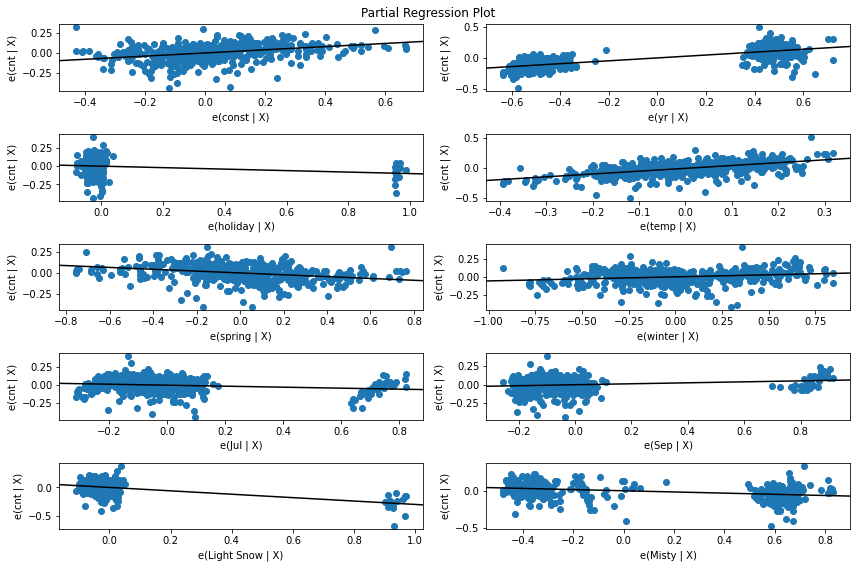

In [78]:
fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_regress_exog(LM7, 'temp', fig=fig)
fig = sm.graphics.plot_partregress_grid(LM7, fig=fig)

From above residual plots its evident that these variable show a nice linear relationship

#### Step 8b Check for Normal distribution of Errors/Residuals

In [79]:
y_train_count = LM7.predict(X_train_LM7)
residual_errors = y_train - y_train_count # residual calculation

Text(0.5, 0, 'Errors')

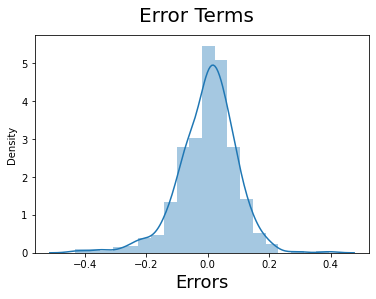

In [80]:
fig = plt.figure()
sns.distplot(residual_errors, bins = 20) # plot distribution plot to check distribution of errors
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

This looks like we meet the assumption that the residuals are normally distributed

#### Step 8c: Check for Homoscedasticity

This assumption checks for variance in the residuals, from below visual we can see that we meet homoscedasticity assumption

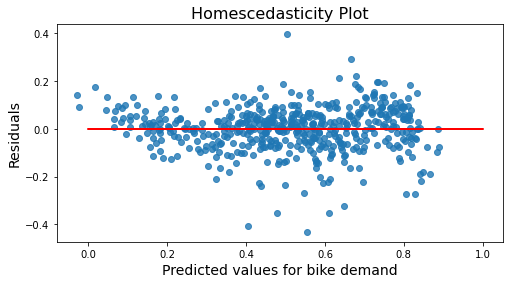

In [81]:
plt.subplots(figsize=(8, 4))
plt.scatter(x=y_train_count, y=residual_errors, alpha=0.8)

plt.plot(y_train,(y_train - y_train), '-r')

plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Predicted values for bike demand', fontsize=14)
plt.title('Homescedasticity Plot', fontsize=16)
plt.show()  

#### Step 8d: Check for Residual Independence

One of the assumptions for LR model is that error terms should not be dependent on one another 

## Step 9 Making predictions based on final model that is LM7

### Apply scaling on test data

In [82]:
numericvars = ['cnt','temp','hum','windspeed']
bikedf_test[numericvars] = scaler.transform(bikedf_test[numericvars])

In [83]:
bikedf_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [84]:
y_test = bikedf_test.pop('cnt')
X_test = bikedf_test

In [85]:
### Add constant variable

X_test_m7= sm.add_constant(X_test)

In [86]:
# Creating X_test_m7 dataframe by selecting variables from final model

fincols = X_train_LM7.columns
X_test_m7 = X_test_m7[fincols]

In [87]:
X_test_m7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   temp        219 non-null    float64
 4   spring      219 non-null    uint8  
 5   winter      219 non-null    uint8  
 6   Jul         219 non-null    uint8  
 7   Sep         219 non-null    uint8  
 8   Light Snow  219 non-null    uint8  
 9   Misty       219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 9.8 KB


In [88]:
y_pred_m7 = LM7.predict(X_test_m7)

### Step 10: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

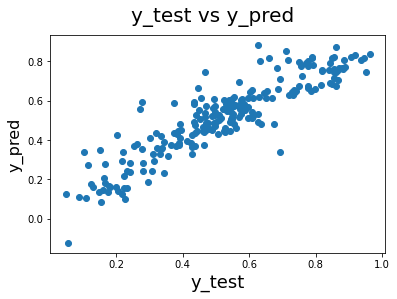

In [89]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Step 11: Calculate R-square for the test data

In [90]:
from sklearn.metrics import r2_score

R2Score = r2_score(y_test, y_pred_m7)
print(R2Score)

0.8092200832884748


### Step 11 Calculate Adjusted R-square for the test data

Formula to get Adjusted R-square is:
</span> AdjR2=1− 
(1-R2Score) x (r-1)/
(r-c-1)
 </font> </span> </span>

In [91]:
r=X_test_m7.shape[0] # r depicts total rows in test dataset
c=X_test_m7.shape[1] # c depicts total columns in test dataset

In [92]:
AdjR2 =  1 - (1-R2Score) * (r-1)/ (r-c-1)

In [93]:
print(AdjR2)

0.800047971908113


In [94]:
print(f' The training data R2 and Adjusted R2 is: {LM7.rsquared} and {LM7.rsquared_adj}')

 The training data R2 and Adjusted R2 is: 0.8225173906649428 and 0.8193227036969117


In [95]:
print(f' The test data R2 and Adjusted R2 is: {R2Score} and {AdjR2}')

 The test data R2 and Adjusted R2 is: 0.8092200832884748 and 0.800047971908113


In [96]:
# Final Models parameters

LM7.params

const         0.193838
yr            0.233037
holiday      -0.101113
temp          0.471172
spring       -0.110708
winter        0.055785
Jul          -0.068771
Sep           0.065793
Light Snow   -0.300245
Misty        -0.079572
dtype: float64

### The equation based on Final Model

##### cnt = 0.193838 + (0.233037 * yr) - (0.101113 * holiday) + (0.471172 * temp) - (0.110708 * spring) + (0.055785 * winter) - (0.068771 * Jul) + (0.065793 * Sep) - (0.300245 * Light Snow) - (0.079572 * Misty)

Interpretation of above equation:

* constant of 0.1938 indicates that even with absence of dependent variables the bike rentals may increase 0.1938 units
* coefficient of 0.233037 of year indicates that if year increases then bike rentals would increase by 0.233037 units
* coefficient of -0.101113 for holiday indicates that bike rentals would decrease if there is a unit increase in holiday
* coefficient of 0.471172 shows that a unit increase in temp would also increase bike rentals by 0.471172 units
* coefficient of -0.110708 indicates that bike rentals decreases by 0.110708 units if there is unit increase in spring
* coefficient of 0.055785 indicates winter unit increase leads to bike rental hike by 0.055785 units
* coefficient of -0.068771 shows that unit increase in July would decrease bike rental by 0.068771 units
* coefficient of 0.065793 shows that unit increase in Sep would increase 0.065793 units of bike rentals
* coefficient of -0.300245 indicates unit increase in Light Snow would decrease bike rentals by 0.300245 units
* coefficient of -0.079572 shows unit increase in Misty weather would decrease bike rentals by 0.079572 units

In [97]:
print(LM7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.16e-181
Time:                        20:18:46   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1938      0.022      8.750      0.0

## Summary of the model

To summarize the top predictors that the model has provided us, which are significant in predicting bike rentals are:

* Temperature that has coefficient of 0.4712 which indicates that it is most important in predicting bike rentals
* Year has positive coefficient which illustrates that with each year bike rentals would grow
* Negative coefficient of Weather condition of Light Snow and Light Rain with Scattered clouds shows that the bike rentals decline during this weather
* As per the months we see September month has positive impact on bike rentals howeverJuly seems to see a decline


## CONCLUSION

<span style="color:brown">In conclusion using Linear Regression on the given dataset we understand that we need Temperature, Year and WeatherSit to predict bike rentals.<ul style="color:blue">
    <li>
When temperature goes high and weather situation is good/pleasant it has positive impact on the bike rentals.</li>
    <li>
Also months play significant role in people preferring bikes for rent.</li>
    <li>
I therefore suggest BoomBikes to increase promotion of their bike rentals during months of Aug and September and during winter season as it has positive impact on bike rentals </li></ul></span>